In [1]:
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import seaborn as sns

In [2]:
def Sensitivity(tn, fp, fn, tp) :
    return tp / (tp + fn)

def Specificity(tn, fp, fn, tp) :
    return tn / (fp + tn)

def Precision(tn, fp, fn, tp) :
    return tp / (tp + fp)

def Recall(tn, fp, fn, tp) :
    return tp / (tp + fn)

def accuracy(tn, fp, fn, tp) :
    return (tp + tn) / (tp + fn + fp + tn)

def f1(tn, fp, fn, tp):
    return (2 * Precision(tn, fp, fn, tp) * Recall(tn, fp, fn, tp))/(Precision(tn, fp, fn, tp)+Recall(tn, fp, fn, tp))

In [3]:
def load_testing():
    images = np.load(os.path.join('../Data_final_massver', 'X_test.npy'))
    labels = np.load(os.path.join('../Data_final_massver', 'test_mass_labels2_num.npy'))
    return images, labels

In [4]:
test_images, test_labels = load_testing()
n_test_img = test_images.shape[0]

test_labels_raw = test_labels.copy()
test_labels = to_categorical(test_labels)

#test_images = test_images.reshape((n_test_img, 256, 256, 1))

test_images = test_images.astype('uint16')/256
test_images = np.repeat(test_images, 3, axis=3)


preprocess_input():  
The preprocess_input function is meant to adequate your image to the format the model requires.
Some models use images with values ranging from 0 to 1. Others from -1 to +1. Others use the "caffe" style, that is not normalized, but is centered.

In [5]:
preprocess_input(test_images);

In [6]:
model = models.load_model('../../../end2end-all-conv/s10_vgg16.h5')

In [7]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

model = models.load_model('../model/vgg16_mass_benign_or_malignant_fine_Adam_best3.h5')

In [8]:
y_pred = model.predict_classes(test_images)
y_pred

AttributeError: 'Model' object has no attribute 'predict_classes'

In [24]:
test_labels_raw

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,

In [89]:
confusion_matrix(test_labels_raw, y_pred, labels=[0, 1])

array([[ 99,  75],
       [ 32, 100]], dtype=int64)

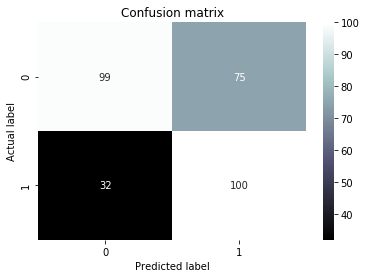

In [142]:
matrix = confusion_matrix(test_labels_raw, y_pred)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="bone" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

TN : 예측값을 Negative 값으로 0으로 예측했고 실제값 역시 Negative 값 0  
FP : 예측값을 Positivie 값 1로 예측했는데 실제값은 Negative 값 0  
FN : 예측값을 Negative 값 0으로 예측했는데 실제값은 Positive 값 1  
TP : 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1   

In [48]:
tn, fp, fn, tp = confusion_matrix(test_labels_raw, y_pred).ravel()
tn, fp, fn, tp

(99, 75, 32, 100)

In [51]:
print('Sensitivity : '+ str(Sensitivity(tn, fp, fn, tp)))
print('Specificity : '+ str(Specificity(tn, fp, fn, tp)))
print('Precision : '+ str(Precision(tn, fp, fn, tp)))
print('Recall : '+ str(Recall(tn, fp, fn, tp)))
print('accuracy : '+ str(accuracy(tn, fp, fn, tp)))
print('f1 : ' + str(f1(tn, fp, fn, tp)))

Sensitivity : 0.7575757575757576
Specificity : 0.5689655172413793
Precision : 0.5714285714285714
Recall : 0.7575757575757576
accuracy : 0.6503267973856209
f1 : 0.6514657980456027


In [53]:
y_pred_prob=model.predict_proba(test_images)
fpr, tpr, thresholds = roc_curve(test_labels_raw, y_pred_prob[:,1])

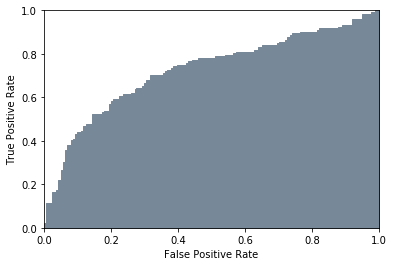

In [147]:
def plot_roc_curve(fpr,tpr):
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate')
    plt.fill_between(fpr,tpr,color='lightslategray')
    plt.show()
plot_roc_curve(fpr,tpr)

In [85]:
auc_score=roc_auc_score(test_labels_raw, y_pred_prob[:,1])
auc_score

0.7250522466039707